### Train a set of gradient boosted trees

Implementation of [LightGBMTrainer](https://github.com/HealthRex/healthrex_ml/blob/main/healthrex_ml/trainers/sklearn_trainers.py#L23)

In [1]:
# import sys
# sys.path.append('../../')
from healthrex_ml.trainers import LightGBMTrainer
from healthrex_ml.trainers import NGBoostTrainer

RUN_NAME = "20230207_baseline_jyx_cbc_withlast"
trainer = NGBoostTrainer(working_dir=f"./{RUN_NAME}_artifacts")
tasks = ['label_PLT', 'label_HCT', 'label_WBC', 'label_HGB']

# for task in tasks:
#     trainer(task)

### Evaluate model performance on test set and dump 

Implementation of [BinaryEvaluator](https://github.com/HealthRex/healthrex_ml/blob/main/healthrex_ml/evaluators/evaluators.py#L21) NPVEvaluator

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:41<00:00, 25.26s/it]


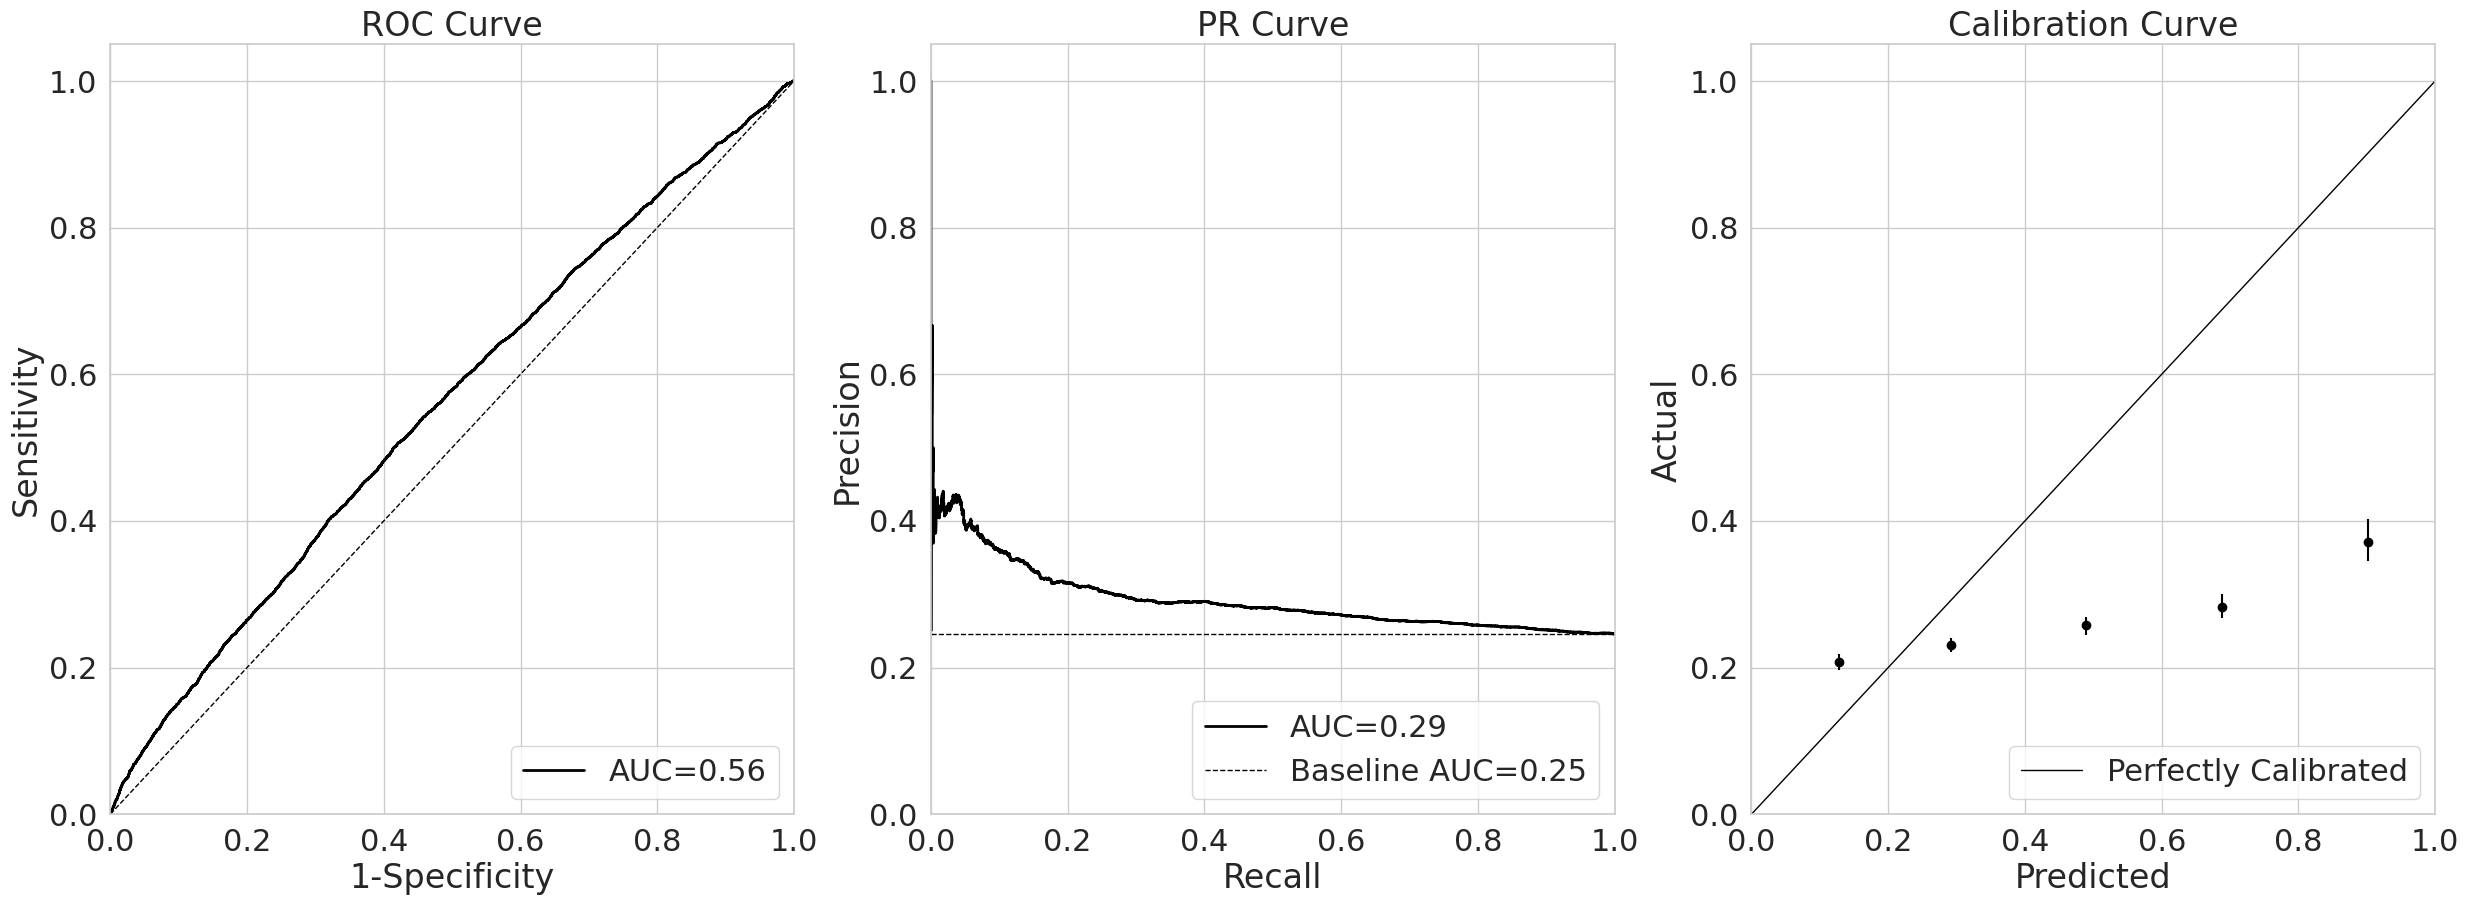

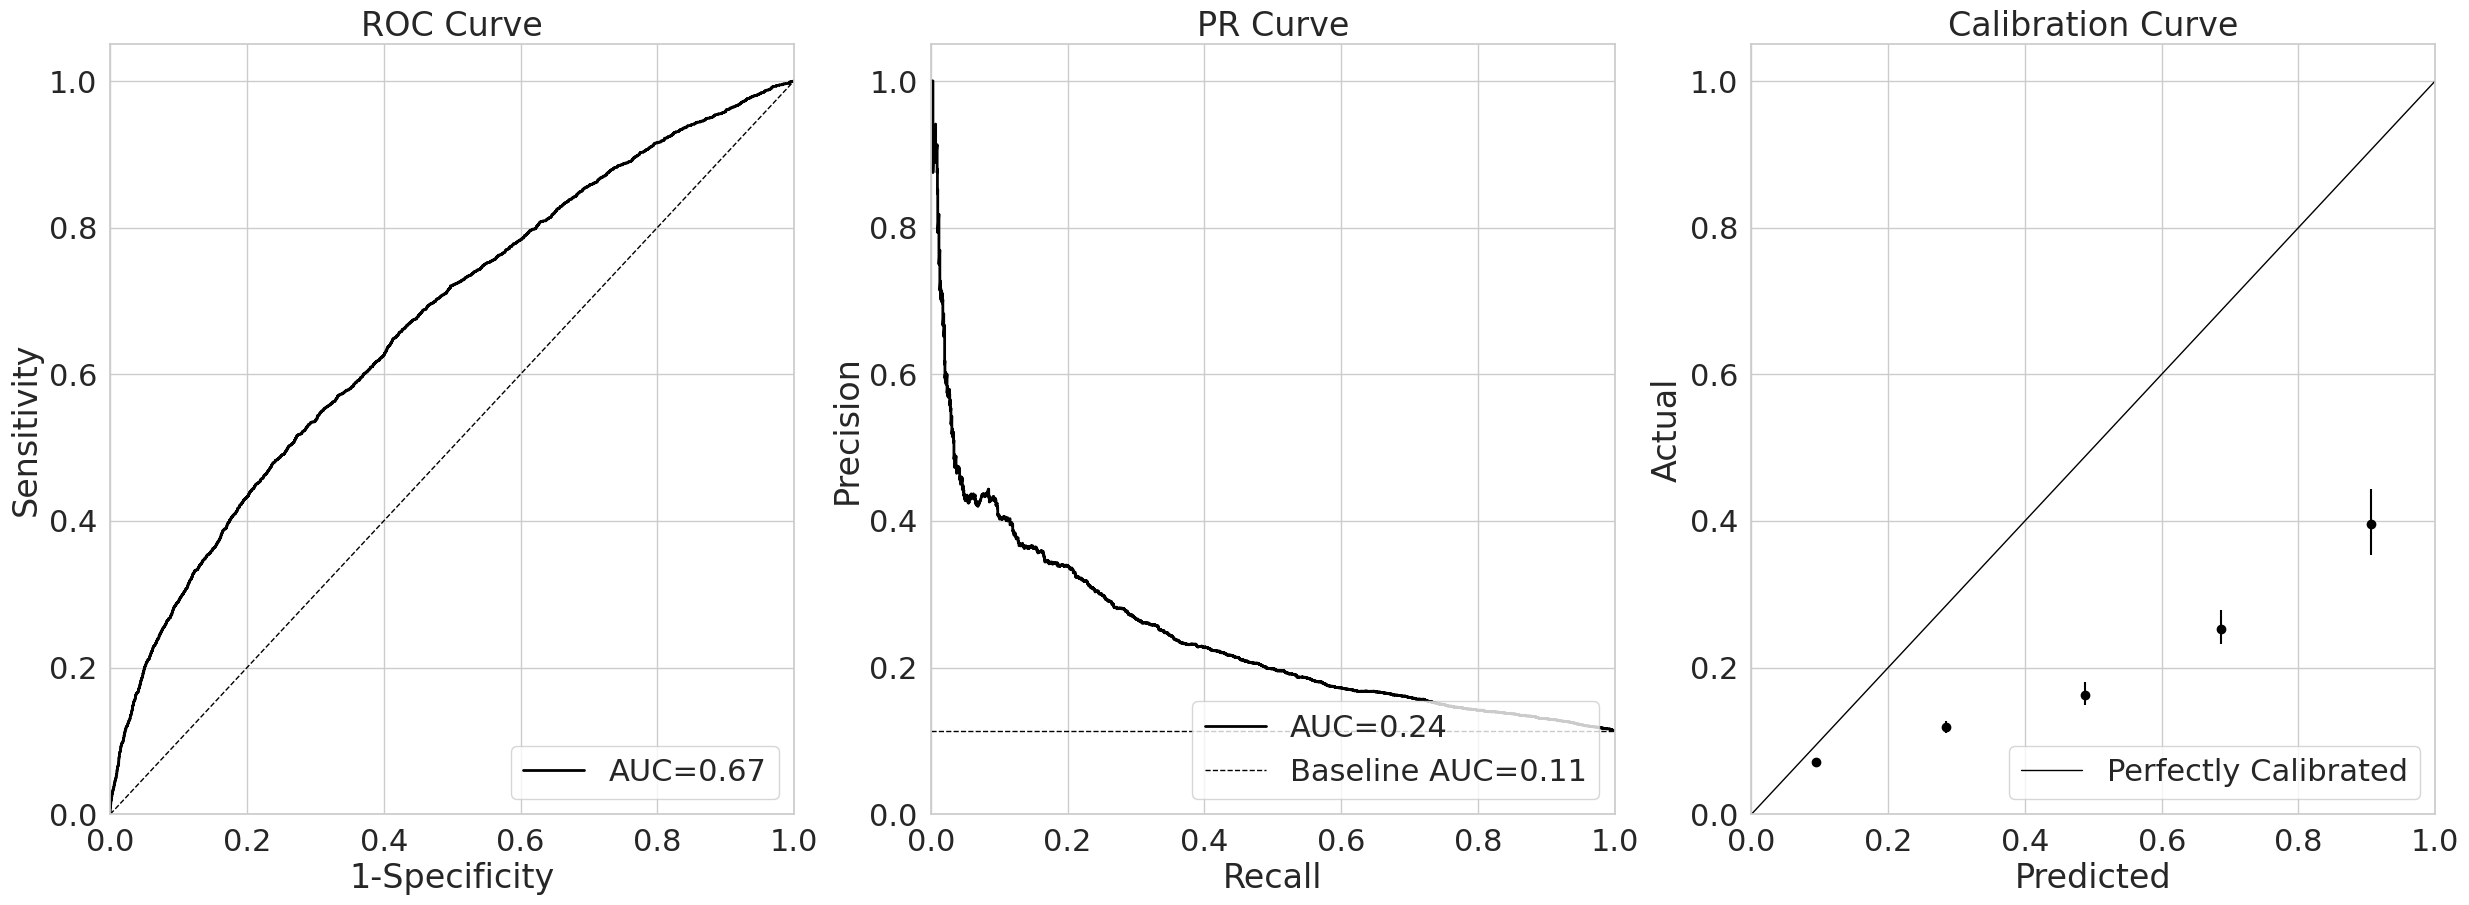

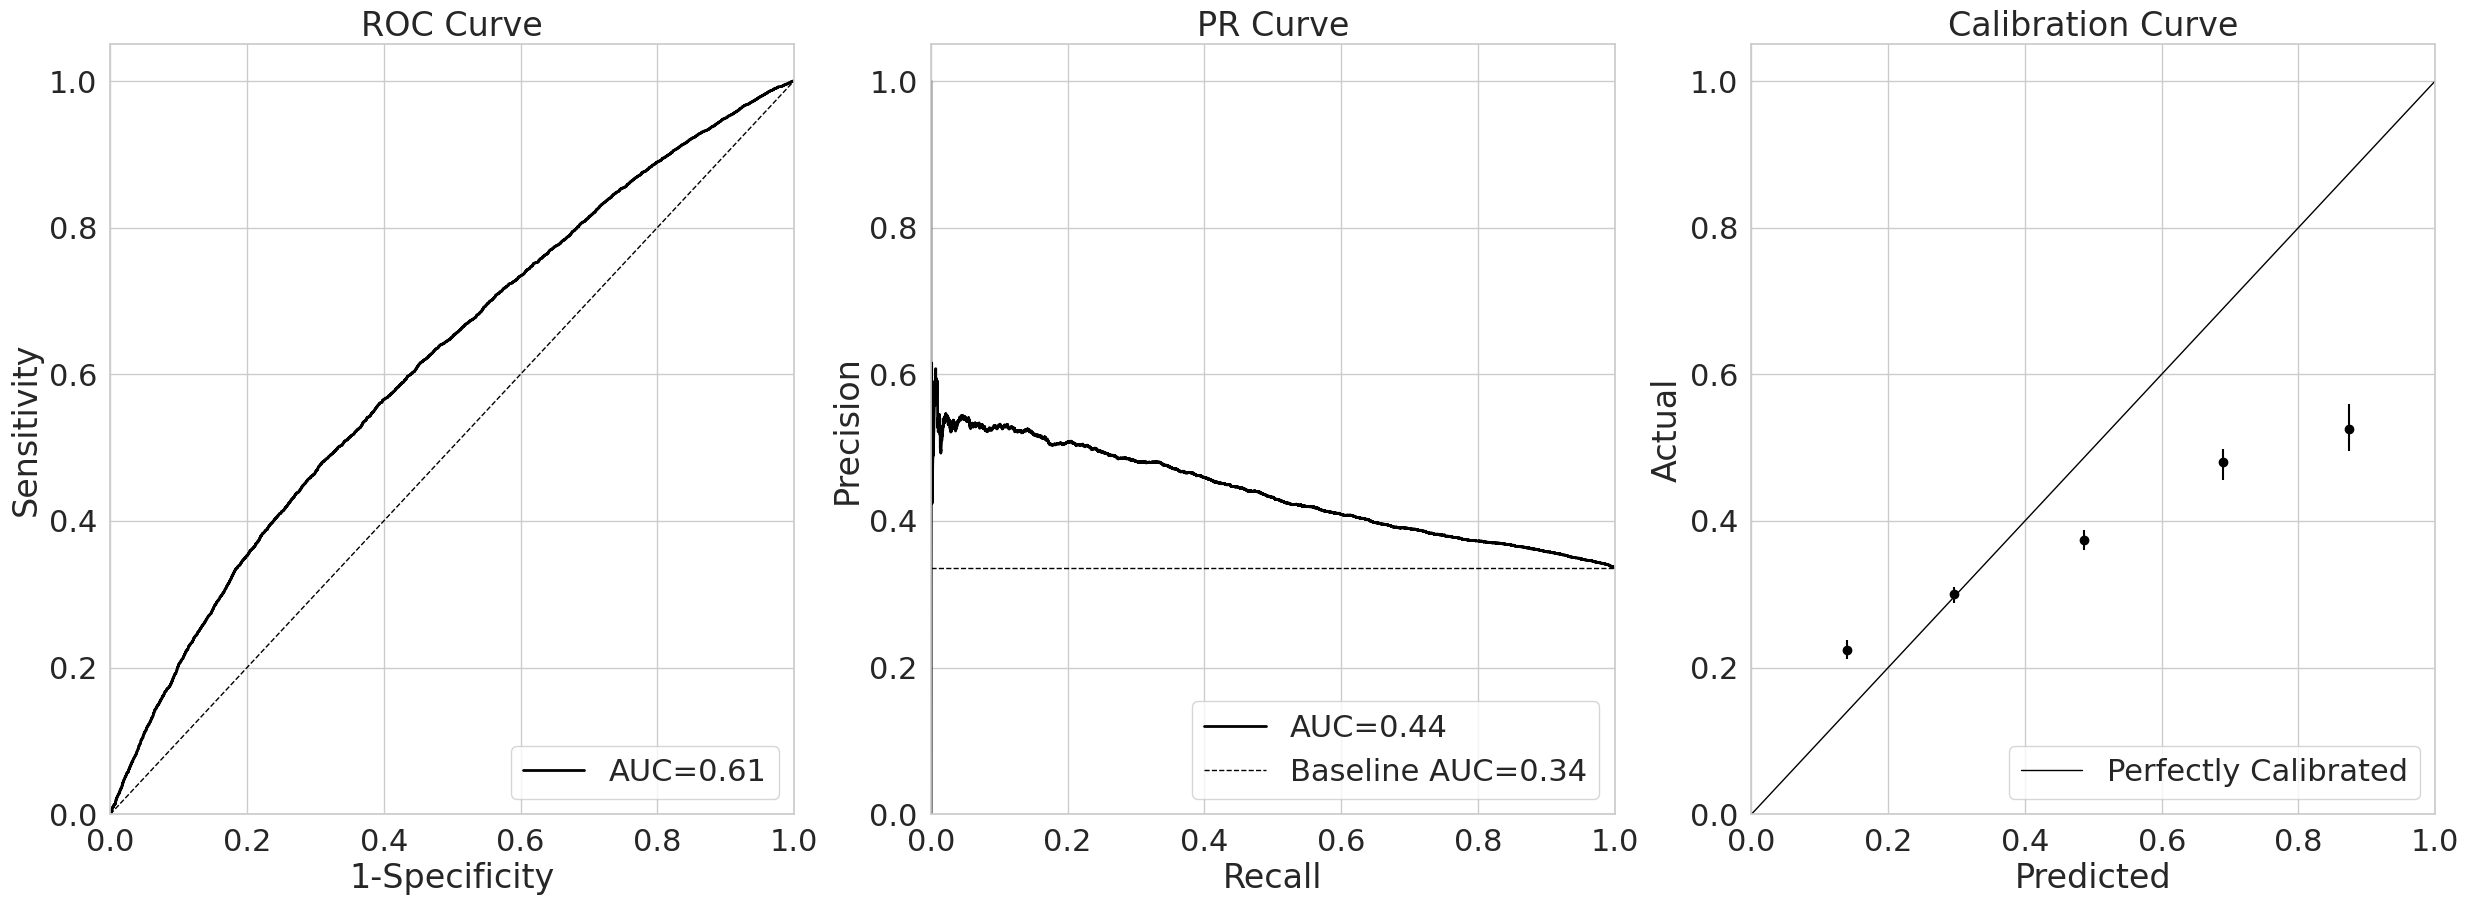

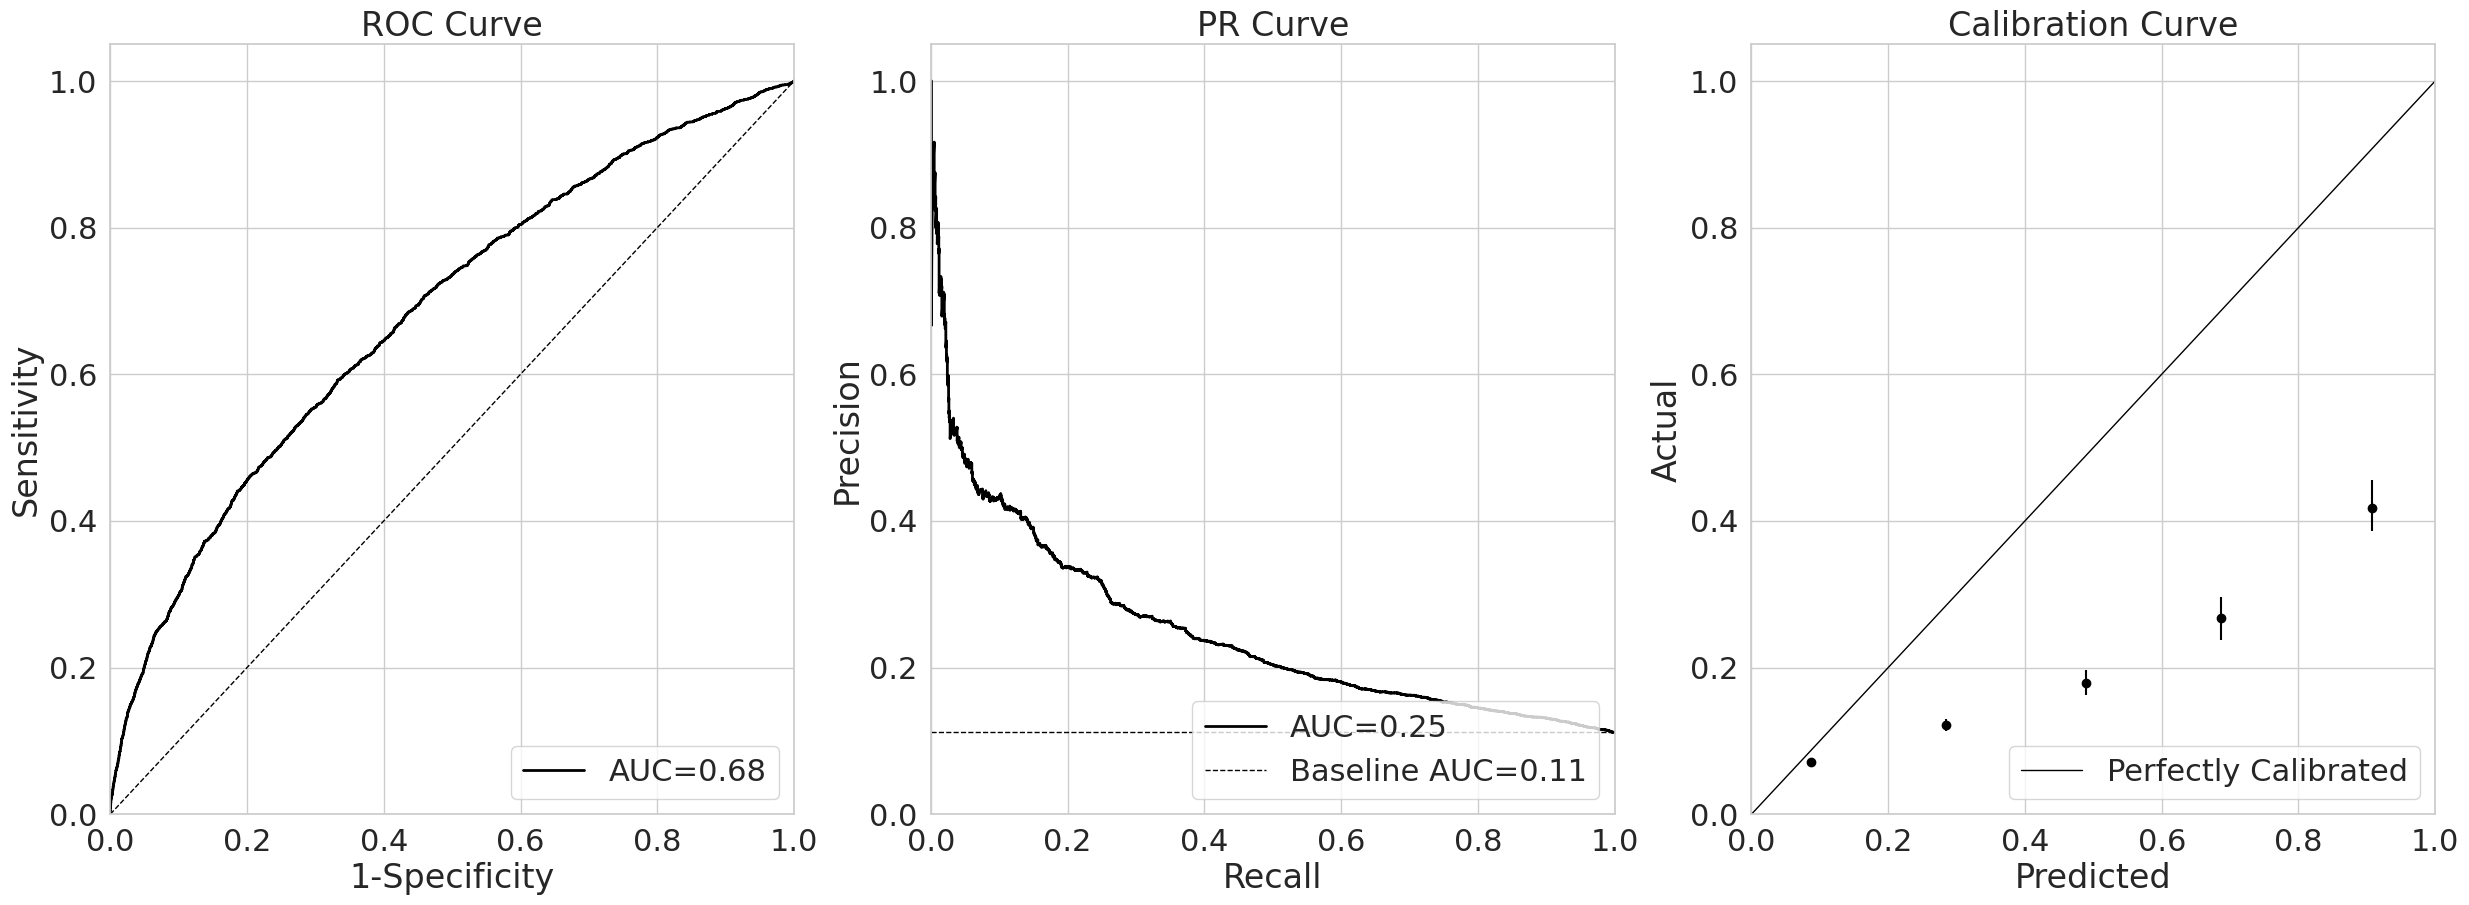

In [3]:
from healthrex_ml.evaluators import BinaryEvaluator
from tqdm import tqdm
import pandas as pd
import os

for task in tqdm(tasks):
    evalr = BinaryEvaluator(
        outdir=f"./{RUN_NAME}_artifacts/{task}_performance_artificats/",
        task_name=task
    )
    df_yhats = pd.read_csv(os.path.join(trainer.working_dir, f"{task}_yhats.csv"))
    evalr.NPV_eval(df_yhats.last_labels, df_yhats.labels, df_yhats.predictions, df_yhats.distribution_norm, pred_type='lower')